# TALLER 2B MÉTODOS ITERATIVOS

**Nombre:** Camila Caicedo

**Grupo:** GR1CC

**Fecha:** 29/12/2025

**Enlace al repositorio:** https://github.com/dxcam/TalleresMetodosNumericos.git

**Grafique la trayectoria de los siguientes sistemas de ecuaciones:**

$x_1+x_2=7$

$−2x_1+5x_2=0$

- $X_0=(0,0)$
- $X_0=(5,2)$


$x_1+x_2=6$

$−2x_1+x_2=0$

**Prueba 3 posiciones iniciales, encuentre una en la que diverge el sistema.**

## Jacobi

In [42]:

import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (6, 6)
plt.rcParams['axes.grid'] = True
plt.rcParams['font.size'] = 11

def jacobi(A, b, x0, tol=1e-8, max_iter=50):
    """Método de Jacobi.
    A: matriz (n,n)
    b: vector (n,)
    x0: vector inicial (n,)
    Devuelve: trayectoria (lista de puntos), x_final, convergencia(bool)
    """
    A = np.array(A, dtype=float)
    b = np.array(b, dtype=float)
    x = np.array(x0, dtype=float)

    D = np.diag(np.diag(A))
    R = A - D  # L + U
    D_inv = np.diag(1.0 / np.diag(D))

    trayectoria = [x.copy()]
    convergente = False

    for k in range(1, max_iter + 1):
        x_new = D_inv @ (b - R @ x)
        trayectoria.append(x_new.copy())
        if np.linalg.norm(x_new - x, ord=2) < tol:
            convergente = True
            x = x_new
            break
        x = x_new

    return trayectoria, x, convergente

def espectral_radius_jacobi(A):
    """Radio espectral de G = D^{-1}(L+U)."""
    A = np.array(A, dtype=float)
    D = np.diag(np.diag(A))
    LplusU = A - D
    D_inv = np.diag(1.0 / np.diag(D))
    G = D_inv @ LplusU
    vals = np.linalg.eigvals(G)
    rho = max(abs(vals))
    return rho, vals

def plot_trayectoria_y_rectas(trayectorias, x_sol, titulo, lineas, x_range=(-2, 8)):
    """
    trayectorias: dict {etiqueta: lista_de_puntos}
    x_sol: np.array([x1, x2])
    titulo: str
    lineas: lista de funciones f(x) que devuelven x2 (cada ecuación despejada)
    x_range: (xmin, xmax) para graficar rectas
    """
    fig, ax = plt.subplots()

    # Rectas de las ecuaciones
    xs = np.linspace(x_range[0], x_range[1], 200)
    colores = ['tab:red', 'tab:blue', 'tab:green', 'tab:orange']
    for i, f in enumerate(lineas):
        ax.plot(xs, f(xs), color=colores[i % len(colores)], lw=2,
                label=f'Ecuación {i+1}')

    # Solución exacta
    ax.scatter([x_sol[0]], [x_sol[1]], marker='*', s=180,
               color='black', label='Solución exacta')

    # Trayectorias
    for etiqueta, tray in trayectorias.items():
        pts = np.array(tray)
        ax.plot(pts[:, 0], pts[:, 1], marker='o', label=etiqueta)
        # flechas de dirección
        for i in range(len(pts) - 1):
            dx, dy = pts[i + 1, 0] - pts[i, 0], pts[i + 1, 1] - pts[i, 1]
            ax.arrow(pts[i, 0], pts[i, 1], dx, dy,
                     length_includes_head=True, head_width=0.12,
                     head_length=0.2, alpha=0.35, color='gray')

    ax.set_xlabel(r'$x_1$')
    ax.set_ylabel(r'$x_2$')
    ax.set_title(titulo)
    ax.legend(loc='best')
    ax.axis('equal')
    plt.show()


Solución Sistema 1: [5. 2.]
Radio espectral ρ(G): 0.6324555320336759 → Converge


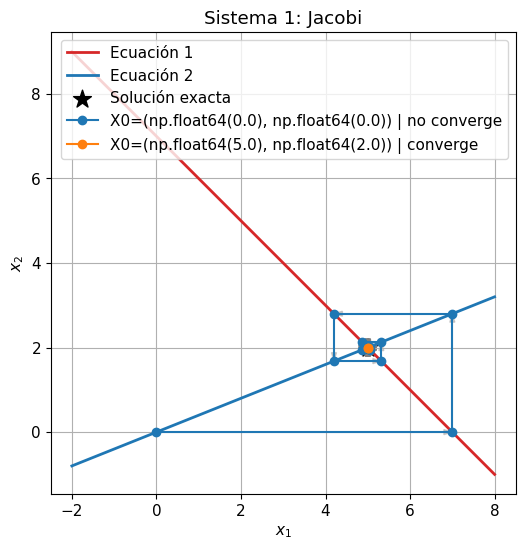

In [43]:

# Sistema 1
A1 = np.array([[1, 1], [-2, 5]], dtype=float)
b1 = np.array([7, 0], dtype=float)

# Puntos iniciales solicitados
x0_list_1 = [np.array([0, 0], float), np.array([5, 2], float)]

# Iteraciones Jacobi
paths1 = {}
for x0 in x0_list_1:
    tray, x_fin, conv = jacobi(A1, b1, x0, tol=1e-10, max_iter=50)
    etiqueta = f"X0={tuple(x0)} | {'converge' if conv else 'no converge'}"
    paths1[etiqueta] = tray

# Solución exacta y diagnóstico
x_sol_1 = np.linalg.solve(A1, b1)
rho1, _ = espectral_radius_jacobi(A1)
print("Solución Sistema 1:", x_sol_1)
print("Radio espectral ρ(G):", rho1, "→", "Converge" if rho1 < 1 else "No converge")

# Rectas de las ecuaciones (despejadas como x2 = f(x1))
lineas_1 = [
    lambda x: 7 - x,         # x1 + x2 = 7
    lambda x: (2/5) * x      # -2x1 + 5x2 = 0  ->  5x2 = 2x1  -> x2 = (2/5)x1
]

# Rango de x1 para graficar las rectas
x_range_1 = (-2, 8)

plot_trayectoria_y_rectas(
    trayectorias=paths1,
    x_sol=x_sol_1,
    titulo="Sistema 1: Jacobi",
    lineas=lineas_1,
    x_range=x_range_1
)


Solución Sistema 2: [2. 4.]
Radio espectral ρ(G): 1.4142135623730951 → Diverge


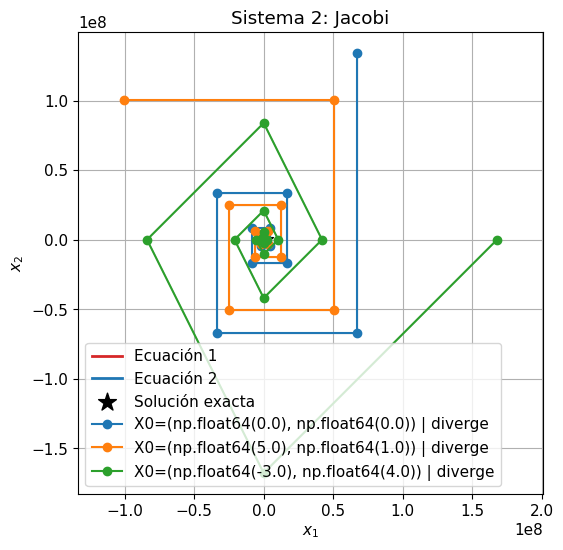

In [45]:

# Sistema 2
A2 = np.array([[1, 1], [-2, 1]], dtype=float)
b2 = np.array([6, 0], dtype=float)

# Tres posiciones iniciales de ejemplo
x0_list_2 = [
    np.array([0, 0], float),
    np.array([5, 1], float),
    np.array([-3, 4], float)
]

paths2 = {}
for x0 in x0_list_2:
    tray, x_fin, conv = jacobi(A2, b2, x0, tol=1e-10, max_iter=50)
    etiqueta = f"X0={tuple(x0)} | {'converge' if conv else 'diverge'}"
    paths2[etiqueta] = tray

x_sol_2 = np.linalg.solve(A2, b2)
rho2, _ = espectral_radius_jacobi(A2)
print("Solución Sistema 2:", x_sol_2)
print("Radio espectral ρ(G):", rho2, "→", "Converge" if rho2 < 1 else "Diverge")

# Rectas de las ecuaciones (x2 = f(x1))
lineas_2 = [
    lambda x: 6 - x,     # x1 + x2 = 6
    lambda x: 2 * x      # -2x1 + x2 = 0  -> x2 = 2x1
]

# Rango de x1 para graficar las rectas
x_range_2 = (-2, 6)

plot_trayectoria_y_rectas(
    trayectorias=paths2,
    x_sol=x_sol_2,
    titulo="Sistema 2: Jacobi",
    lineas=lineas_2,
    x_range=x_range_2
)


## Gauss–Seidel

In [46]:

import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (6, 6)
plt.rcParams['axes.grid'] = True
plt.rcParams['font.size'] = 11

def gauss_seidel(A, b, x0, tol=1e-8, max_iter=50):
    """Método de Gauss–Seidel para Ax=b."""
    A = np.array(A, dtype=float)
    b = np.array(b, dtype=float)
    x = np.array(x0, dtype=float)

    n = A.shape[0]
    trayectoria = [x.copy()]
    convergente = False

    for k in range(1, max_iter + 1):
        x_new = x.copy()
        for i in range(n):
            s1 = np.dot(A[i, :i], x_new[:i])
            s2 = np.dot(A[i, i+1:], x[i+1:])
            x_new[i] = (b[i] - s1 - s2) / A[i, i]

        trayectoria.append(x_new.copy())
        if np.linalg.norm(x_new - x, ord=2) < tol:
            convergente = True
            x = x_new
            break
        x = x_new

    return trayectoria, x, convergente

def espectral_radius_gs(A):
    """Radio espectral del operador de Gauss–Seidel G = (D+L)^{-1} U."""
    A = np.array(A, dtype=float)
    D = np.diag(np.diag(A))
    L = np.tril(A, -1)
    U = np.triu(A, 1)
    G = np.linalg.inv(D + L) @ U
    vals = np.linalg.eigvals(G)
    rho = max(abs(vals))
    return rho, vals

def plot_trayectoria_y_rectas(trayectorias, x_sol, titulo,
                              rectas_fns, rectas_labels, x_range=(-2, 8)):
    """
    trayectorias: dict {etiqueta: lista_de_puntos}
    x_sol: np.array([x1, x2])
    titulo: str
    rectas_fns: lista de funciones f(x1) -> x2
    rectas_labels: lista de etiquetas (mismo orden que rectas_fns)
    x_range: (xmin, xmax) para graficar rectas
    """
    fig, ax = plt.subplots()

    # Rectas (sin colores específicos)
    xs = np.linspace(x_range[0], x_range[1], 300)
    for f, lab in zip(rectas_fns, rectas_labels):
        ax.plot(xs, f(xs), lw=2, label=lab)

    # Solución exacta
    ax.scatter([x_sol[0]], [x_sol[1]], marker='*', s=180,
               color='black', label='Solución exacta')

    # Trayectorias de las iteraciones
    for etiqueta, tray in trayectorias.items():
        pts = np.array(tray)
        ax.plot(pts[:, 0], pts[:, 1], marker='o', label=etiqueta)
        # flechas de dirección
        for i in range(len(pts) - 1):
            dx, dy = pts[i + 1, 0] - pts[i, 0], pts[i + 1, 1] - pts[i, 1]
            ax.arrow(pts[i, 0], pts[i, 1], dx, dy,
                     length_includes_head=True, head_width=0.12,
                     head_length=0.2, alpha=0.35)  # sin color explícito

    ax.set_xlabel(r'$x_1$')
    ax.set_ylabel(r'$x_2$')
    ax.set_title(titulo)
    ax.legend(loc='best')
    ax.axis('equal')
    plt.show()


Solución Sistema 1 (exacta): [5. 2.]
Radio espectral GS ρ(G): 0.4 → Converge


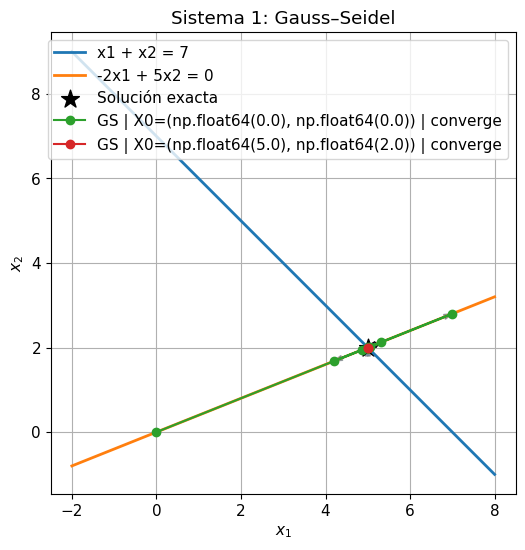

In [47]:

# Sistema 1
A1 = np.array([[1, 1], [-2, 5]], dtype=float)
b1 = np.array([7, 0], dtype=float)

x0_list_1 = [np.array([0, 0], float), np.array([5, 2], float)]

paths1 = {}
for x0 in x0_list_1:
    tray, x_fin, conv = gauss_seidel(A1, b1, x0, tol=1e-10, max_iter=50)
    etiqueta = f"GS | X0={tuple(x0)} | {'converge' if conv else 'no converge'}"
    paths1[etiqueta] = tray

x_sol_1 = np.linalg.solve(A1, b1)
rho1_gs, _ = espectral_radius_gs(A1)
print("Solución Sistema 1 (exacta):", x_sol_1)
print("Radio espectral GS ρ(G):", rho1_gs, "→", "Converge" if rho1_gs < 1 else "No converge")

# Rectas (sin colores específicos)
rectas_fns_1 = [
    lambda x: 7 - x,        # x1 + x2 = 7
    lambda x: (2/5) * x     # -2x1 + 5x2 = 0 -> x2 = (2/5) x1
]
rectas_labels_1 = [
    'x1 + x2 = 7',
    '-2x1 + 5x2 = 0'
]

plot_trayectoria_y_rectas(
    trayectorias=paths1,
    x_sol=x_sol_1,
    titulo="Sistema 1: Gauss–Seidel",
    rectas_fns=rectas_fns_1,
    rectas_labels=rectas_labels_1,
    x_range=(-2, 8)
)



Solución Sistema 2 (exacta): [2. 4.]
Radio espectral GS ρ(G): 2.0 → Diverge


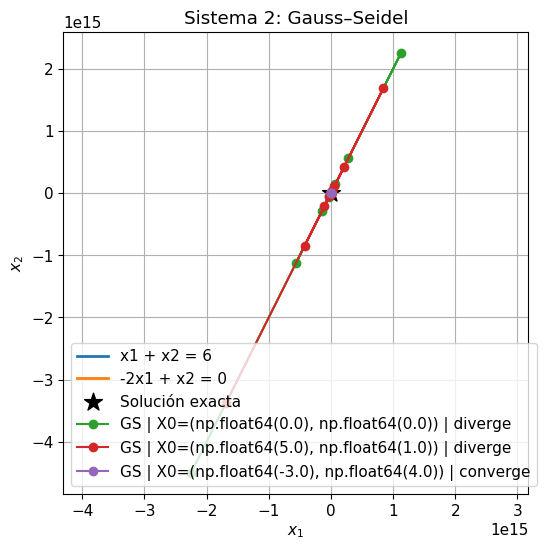

In [48]:

# Sistema 2
A2 = np.array([[1, 1], [-2, 1]], dtype=float)
b2 = np.array([6, 0], dtype=float)

x0_list_2 = [
    np.array([0, 0], float),
    np.array([5, 1], float),
    np.array([-3, 4], float)
]

paths2 = {}
for x0 in x0_list_2:
    tray, x_fin, conv = gauss_seidel(A2, b2, x0, tol=1e-10, max_iter=50)
    etiqueta = f"GS | X0={tuple(x0)} | {'converge' if conv else 'diverge'}"
    paths2[etiqueta] = tray

x_sol_2 = np.linalg.solve(A2, b2)
rho2_gs, _ = espectral_radius_gs(A2)
print("Solución Sistema 2 (exacta):", x_sol_2)
print("Radio espectral GS ρ(G):", rho2_gs, "→", "Converge" if rho2_gs < 1 else "Diverge")

# Rectas (sin colores específicos)
rectas_fns_2 = [
    lambda x: 6 - x,  # x1 + x2 = 6
    lambda x: 2 * x   # -2x1 + x2 = 0 -> x2 = 2x1
]
rectas_labels_2 = [
    'x1 + x2 = 6',
    '-2x1 + x2 = 0'
]

plot_trayectoria_y_rectas(
    trayectorias=paths2,
    x_sol=x_sol_2,
    titulo="Sistema 2: Gauss–Seidel",
    rectas_fns=rectas_fns_2,
    rectas_labels=rectas_labels_2,
    x_range=(-2, 6)
)
